In [1]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset


Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
import matplotlib.pyplot as plt



def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [3]:
# Import data 
iris = datasets.load_iris()


X = iris.data
y = iris.target


# Center the data to the mean
X_scaled = preprocessing.scale(X, with_std=False)

In [4]:
# Perform Linear PCA on it, keeping only 2 principal components for plotting
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X = X_pca

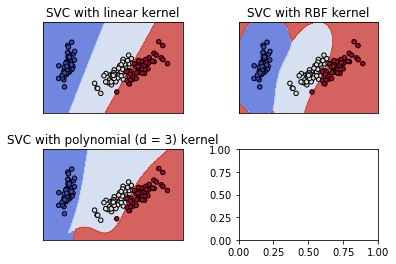

In [5]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

models = (svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=3))
models = (clf.fit(X, y) for clf in models)


# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (d = 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [6]:
models = (svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=3))


models = (clf.fit(X, y) for clf in models)


for clf in models:
    print (clf.score(X, y))

0.966666666667
0.953333333333
0.96


In [7]:
X = iris.data
y = iris.target

# Center the data to the mean
X_scaled = preprocessing.scale(X, with_std=False)

kpca = KernelPCA(n_components=100, kernel='rbf', gamma=0.25, fit_inverse_transform=True).fit(X_scaled)
X_kpca = kpca.transform(X_scaled)
X = kpca.inverse_transform(X_kpca)


models = (svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=3))

models = (clf.fit(X, y) for clf in models)

for clf in models:
    print (clf.score(X, y))

0.973333333333
0.973333333333
0.913333333333
